# $$Análise~GeoEspacial: Roubo~ de ~veículo$$

### $$Conceito:$$

## $$1°- Objetivo:$$  

## $$Fazer~ análise~ dos ~dados ~de~ roubo~ de ~veículo~no~ estado~ de ~São~ Paulo ~em ~202, ~ usar ~analise ~espacial ~e ~tirar ~insights$$

In [17]:
from shapely.geometry import Point
import geopandas as gpd

In [14]:
#Pacotes
import warnings
warnings.filterwarnings('ignore')
import pysal
import libpysal
import geopandas as gpd
from libpysal.weights import Queen, Rook, KNN
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from splot.esda import plot_moran, moran_scatterplot, lisa_cluster, plot_local_autocorrelation

## Carregando os Dados 

In [15]:
#Base de dados
dados = pd.read_csv("Rb.csv", encoding = 'latin1',error_bad_lines=False,sep=';')
dados

,ANO_BO,DATAOCORRENCIA,PERIDOOCORRENCIA,FLAGRANTE,CIDADE,UF,LATITUDE,LONGITUDE,STATUS,DESCR_MARCA_VEICULO,ANO_FABRICACAO,DESCR_TIPO_VEICULO
0,2021,30/11/2021,A NOITE,Não,S.BERNARDO DO CAMPO,SP,"-23,65959979","-46,56869488",Consumado,HONDA/CITY DX FLEX,2010.0,AUTOMOVEL
1,2021,30/11/2021,A NOITE,Não,DIADEMA,SP,"-23,69411285","-46,63133896",Consumado,GM/MERIVA PREMIUM,2010.0,AUTOMOVEL
2,2021,30/11/2021,A NOITE,Não,S.PAULO,SP,NaN,NaN,Consumado,FIAT/IDEA,2006.0,AUTOMOVEL
3,2021,30/11/2021,A NOITE,Não,EMBU-GUACU,SP,"-23,8784302","-46,79385535",Consumado,YAMAHA/YBR150 FACTOR ED,2020.0,MOTOCICLO
4,2021,30/11/2021,A NOITE,Não,S.PAULO,SP,"-23,59956763","-46,61811407",Consumado,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7848,2021,31/12/2021,A NOITE,Não,COTIA,SP,"-23,60996929","-46,93162265",Consumado,NaN,NaN,NaN
7849,2021,31/12/2021,A NOITE,Não,RIO CLARO,SP,"-22,41841691","-47,56856582",Consumado,NaN,0.0,NaN
7850,2021,31/12/2021,A NOITE,Não,RIO CLARO,SP,"-22,41841691","-47,56856582",Consumado,I/BMW 120I UF51,2006.0,AUTOMOVEL
7851,2021,31/12/2021,A NOITE,Não,RIO CLARO,SP,"-22,41841691","-47,56856582",Consumado,NaN,0.0,NaN


# Carregando o shapefile do Estado de SP

In [18]:
sp =gpd.read_file('shapefile_sp/estado_sp.shp')


ImportError: The 'read_file' function requires the 'pyogrio' or 'fiona' package, but neither is installed or imports correctly.
Importing fiona resulted in: DLL load failed while importing ogrext: Não foi possível encontrar o módulo especificado.
Importing pyogrio resulted in: No module named 'pyogrio'

**Carregando o shapeFile do estado de São Paulo para construção dos gráficos para analise espacial**

# Dicionário de Dados das Variáveis 

**$$Variáveis:$$**

**-ANO_BO:** Ano que foi processado o B.O

**-DATAOCORRENCIA:** Data que foi processado o B.O
    
**-PERIDOOCORRENCIA:** Período da ocorrência

**-FLAGRANTE:** Se houve flagrante ou não 

**-CIDADE:** Cidade que ocorreu o ato
    
**-UF:** Estado que ocorreu o ato

**-LATITUDE:** Latitude do ato

**-LONGITUDE:** Longitude do ato
    
**-STATUS:** Se o ato do roubo foi consumado ou não

**-DESCR_MARCA_VEICULO:** Marca do veiculo 

**-ANO_FABRICACAO:** Ano de fabricação do veiculo
    
**-DESCR_TIPO_VEICULO:** Descrição do tipo de veiculo


In [4]:
#Tipos de variáveis
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7853 entries, 0 to 7852
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ANO_BO               7853 non-null   int64  
 1   DATAOCORRENCIA       7853 non-null   object 
 2   PERIDOOCORRENCIA     7853 non-null   object 
 3   FLAGRANTE            7853 non-null   object 
 4   CIDADE               7853 non-null   object 
 5   UF                   7853 non-null   object 
 6   LATITUDE             7101 non-null   object 
 7   LONGITUDE            7101 non-null   object 
 8   STATUS               7853 non-null   object 
 9   DESCR_MARCA_VEICULO  5896 non-null   object 
 10  ANO_FABRICACAO       7697 non-null   float64
 11  DESCR_TIPO_VEICULO   5896 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 736.3+ KB


In [5]:
# Função para extrair somente os primeiros numeros da variável de data
def extrai_data(x):
    return x[0:2]
# Extrai mês, semana e dia da coluna de data
dados["Dia"] = dados["DATAOCORRENCIA"].apply(extrai_data)
dados

,ANO_BO,DATAOCORRENCIA,PERIDOOCORRENCIA,FLAGRANTE,CIDADE,UF,LATITUDE,LONGITUDE,STATUS,DESCR_MARCA_VEICULO,ANO_FABRICACAO,DESCR_TIPO_VEICULO,Dia
0,2021,30/11/2021,A NOITE,Não,S.BERNARDO DO CAMPO,SP,"-23,65959979","-46,56869488",Consumado,HONDA/CITY DX FLEX,2010.0,AUTOMOVEL,30
1,2021,30/11/2021,A NOITE,Não,DIADEMA,SP,"-23,69411285","-46,63133896",Consumado,GM/MERIVA PREMIUM,2010.0,AUTOMOVEL,30
2,2021,30/11/2021,A NOITE,Não,S.PAULO,SP,NaN,NaN,Consumado,FIAT/IDEA,2006.0,AUTOMOVEL,30
3,2021,30/11/2021,A NOITE,Não,EMBU-GUACU,SP,"-23,8784302","-46,79385535",Consumado,YAMAHA/YBR150 FACTOR ED,2020.0,MOTOCICLO,30
4,2021,30/11/2021,A NOITE,Não,S.PAULO,SP,"-23,59956763","-46,61811407",Consumado,NaN,0.0,NaN,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7848,2021,31/12/2021,A NOITE,Não,COTIA,SP,"-23,60996929","-46,93162265",Consumado,NaN,NaN,NaN,31
7849,2021,31/12/2021,A NOITE,Não,RIO CLARO,SP,"-22,41841691","-47,56856582",Consumado,NaN,0.0,NaN,31
7850,2021,31/12/2021,A NOITE,Não,RIO CLARO,SP,"-22,41841691","-47,56856582",Consumado,I/BMW 120I UF51,2006.0,AUTOMOVEL,31
7851,2021,31/12/2021,A NOITE,Não,RIO CLARO,SP,"-22,41841691","-47,56856582",Consumado,NaN,0.0,NaN,31


In [6]:
#Substituir a string '/' por '-' para transformar a variável em Datetime
dados['DATAOCORRENCIA'] = dados.DATAOCORRENCIA.replace('/','-')

In [7]:
# Transforamar a coluna de data Str em Datetime
dados['DATAOCORRENCIA']= pd.to_datetime(dados['DATAOCORRENCIA'], errors = 'coerce')
dados

,ANO_BO,DATAOCORRENCIA,PERIDOOCORRENCIA,FLAGRANTE,CIDADE,UF,LATITUDE,LONGITUDE,STATUS,DESCR_MARCA_VEICULO,ANO_FABRICACAO,DESCR_TIPO_VEICULO,Dia
0,2021,2021-11-30,A NOITE,Não,S.BERNARDO DO CAMPO,SP,"-23,65959979","-46,56869488",Consumado,HONDA/CITY DX FLEX,2010.0,AUTOMOVEL,30
1,2021,2021-11-30,A NOITE,Não,DIADEMA,SP,"-23,69411285","-46,63133896",Consumado,GM/MERIVA PREMIUM,2010.0,AUTOMOVEL,30
2,2021,2021-11-30,A NOITE,Não,S.PAULO,SP,NaN,NaN,Consumado,FIAT/IDEA,2006.0,AUTOMOVEL,30
3,2021,2021-11-30,A NOITE,Não,EMBU-GUACU,SP,"-23,8784302","-46,79385535",Consumado,YAMAHA/YBR150 FACTOR ED,2020.0,MOTOCICLO,30
4,2021,2021-11-30,A NOITE,Não,S.PAULO,SP,"-23,59956763","-46,61811407",Consumado,NaN,0.0,NaN,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7848,2021,2021-12-31,A NOITE,Não,COTIA,SP,"-23,60996929","-46,93162265",Consumado,NaN,NaN,NaN,31
7849,2021,2021-12-31,A NOITE,Não,RIO CLARO,SP,"-22,41841691","-47,56856582",Consumado,NaN,0.0,NaN,31
7850,2021,2021-12-31,A NOITE,Não,RIO CLARO,SP,"-22,41841691","-47,56856582",Consumado,I/BMW 120I UF51,2006.0,AUTOMOVEL,31
7851,2021,2021-12-31,A NOITE,Não,RIO CLARO,SP,"-22,41841691","-47,56856582",Consumado,NaN,0.0,NaN,31


In [8]:
#Verificar valores nulos
dados.isnull().sum()

ANO_BO                    0
DATAOCORRENCIA            2
PERIDOOCORRENCIA          0
FLAGRANTE                 0
CIDADE                    0
UF                        0
LATITUDE                752
LONGITUDE               752
STATUS                    0
DESCR_MARCA_VEICULO    1957
ANO_FABRICACAO          156
DESCR_TIPO_VEICULO     1957
Dia                       0
dtype: int64

In [9]:
#Excluir valores nulos da coluna DATAOCORRENCIA , Latitude e Longitude 
dados.dropna(subset=['DATAOCORRENCIA'],inplace=True)
dados.dropna(subset=['LATITUDE'],inplace=True)
dados.dropna(subset=['LONGITUDE'],inplace=True)
dados.isnull().sum()

ANO_BO                    0
DATAOCORRENCIA            0
PERIDOOCORRENCIA          0
FLAGRANTE                 0
CIDADE                    0
UF                        0
LATITUDE                  0
LONGITUDE                 0
STATUS                    0
DESCR_MARCA_VEICULO    1793
ANO_FABRICACAO          139
DESCR_TIPO_VEICULO     1793
Dia                       0
dtype: int64

In [10]:
#Criar uma coluna com o nome do Mes e dia da semana
dados["Mes"]=dados.DATAOCORRENCIA.map(lambda x:x.strftime("%B"))
dados["Dia_da_Semana"]=dados.DATAOCORRENCIA.map(lambda x:x.strftime("%A"))
dados.head(5)

,ANO_BO,DATAOCORRENCIA,PERIDOOCORRENCIA,FLAGRANTE,CIDADE,UF,LATITUDE,LONGITUDE,STATUS,DESCR_MARCA_VEICULO,ANO_FABRICACAO,DESCR_TIPO_VEICULO,Dia,Mes,Dia_da_Semana
0,2021,2021-11-30,A NOITE,Não,S.BERNARDO DO CAMPO,SP,"-23,65959979","-46,56869488",Consumado,HONDA/CITY DX FLEX,2010.0,AUTOMOVEL,30,November,Tuesday
1,2021,2021-11-30,A NOITE,Não,DIADEMA,SP,"-23,69411285","-46,63133896",Consumado,GM/MERIVA PREMIUM,2010.0,AUTOMOVEL,30,November,Tuesday
3,2021,2021-11-30,A NOITE,Não,EMBU-GUACU,SP,"-23,8784302","-46,79385535",Consumado,YAMAHA/YBR150 FACTOR ED,2020.0,MOTOCICLO,30,November,Tuesday
4,2021,2021-11-30,A NOITE,Não,S.PAULO,SP,"-23,59956763","-46,61811407",Consumado,NaN,0.0,NaN,30,November,Tuesday
5,2021,2021-11-30,A NOITE,Não,S.PAULO,SP,"-23,59956763","-46,61811407",Consumado,I/MINI COOPER SCYMAN,2015.0,CAMIONETA,30,November,Tuesday


## Transformar as variáveis latitude e longitude em Geometry

In [11]:
from shapely.geometry import Point

#Substituir ',' por '.' para transformar as variáveis em float
dados['LATITUDE'] = dados.LATITUDE.str.replace(',', '.')
dados['LONGITUDE'] = dados.LONGITUDE.str.replace(',','.')


#Transformar as variáveis Lat e Long em Int
dados['LATITUDE'] = pd.to_numeric(dados['LATITUDE'], errors='coerce')
dados['LONGITUDE'] = pd.to_numeric(dados['LONGITUDE'], errors='coerce')

# Criar a coluna Geometry 
geometry = [Point(xy) for xy in zip(dados['LONGITUDE'], dados['LATITUDE'])]


#Criar Geodataframe 
dados = gpd.GeoDataFrame(dados, geometry=geometry)
dados .head(5)

,ANO_BO,DATAOCORRENCIA,PERIDOOCORRENCIA,FLAGRANTE,CIDADE,UF,LATITUDE,LONGITUDE,STATUS,DESCR_MARCA_VEICULO,ANO_FABRICACAO,DESCR_TIPO_VEICULO,Dia,Mes,Dia_da_Semana,geometry
0,2021,2021-11-30,A NOITE,Não,S.BERNARDO DO CAMPO,SP,-23.659600,-46.568695,Consumado,HONDA/CITY DX FLEX,2010.0,AUTOMOVEL,30,November,Tuesday,POINT (-46.56869 -23.65960)
1,2021,2021-11-30,A NOITE,Não,DIADEMA,SP,-23.694113,-46.631339,Consumado,GM/MERIVA PREMIUM,2010.0,AUTOMOVEL,30,November,Tuesday,POINT (-46.63134 -23.69411)
3,2021,2021-11-30,A NOITE,Não,EMBU-GUACU,SP,-23.878430,-46.793855,Consumado,YAMAHA/YBR150 FACTOR ED,2020.0,MOTOCICLO,30,November,Tuesday,POINT (-46.79386 -23.87843)
4,2021,2021-11-30,A NOITE,Não,S.PAULO,SP,-23.599568,-46.618114,Consumado,NaN,0.0,NaN,30,November,Tuesday,POINT (-46.61811 -23.59957)
5,2021,2021-11-30,A NOITE,Não,S.PAULO,SP,-23.599568,-46.618114,Consumado,I/MINI COOPER SCYMAN,2015.0,CAMIONETA,30,November,Tuesday,POINT (-46.61811 -23.59957)


**Transformando as variáveis Latitude e Longitude em Geometry, conseguimos destacar os pontos de dados no mapa de cada cidade**

# Analise Exploratória

### Mes

In [12]:
#Agrupar os crimes por dia 
bo = pd.DataFrame(dados.groupby('Mes')['Dia'].count()).reset_index()
bo.columns = ['Meses','N_Bo']
sort = [4,8,12,2,1,7,6,3,5,11,10,9]
bo['N_Mes'] = sort
bo = bo.sort_values('N_Mes',ascending=True)
bo = bo.iloc[:,0:2]
bo

,Meses,N_Bo
4,January,258
3,February,218
7,March,306
0,April,233
8,May,232
6,June,231
5,July,233
1,August,186
11,September,273
10,October,266


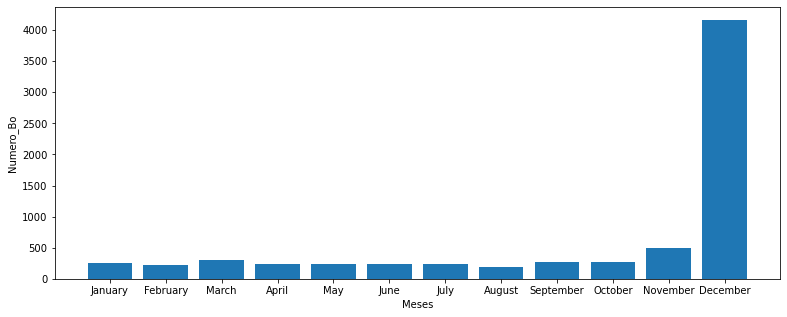

In [13]:
#Plot do Numero de BO's
plt.figure(figsize=(13, 5))
plt.bar(bo.Meses,bo['N_Bo'])
plt.xlabel('Meses')
plt.ylabel('Numero_Bo');

**Note que o mês de dezembro é disparado o mês onde há mais ocorrências de B.O**

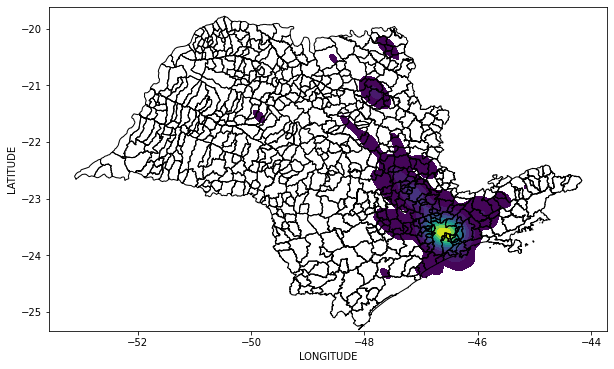

In [14]:
#Analise espacial do mês de Dezembro
dec = dados[dados.Mes=='December']

#heatmap das regiões de maior concentração
import seaborn as sns
fig , ax = plt.subplots(figsize=(10,7))
sns.kdeplot(dados.LONGITUDE,dados.LATITUDE, shade=True, cmap='viridis')
sp.plot(ax=ax,facecolor='None',edgecolor='black');

**Observamos que há efeito spillover(Transbordamento), as regiões com os índices altos impactam a regiões mais próximas com os mesmos índices**

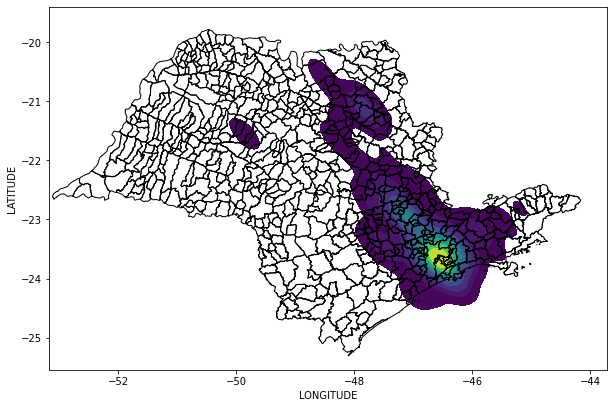

In [15]:
#Ponto de Inicialização do mapa
import folium
from folium.plugins import FastMarkerCluster
init = folium.Map(location=[-23.5489, -46.6388], zoom_start=10, tiles='CartoDB positron')

#Excluir a cidade de São Paulo
dados_bo1 = dec[dec.CIDADE!='S.PAULO']

#heatmap das regiões de maior concentração
import seaborn as sns
fig , ax = plt.subplots(figsize=(10,7))
sns.kdeplot(dados_bo1.LONGITUDE,dados_bo1.LATITUDE, shade=True, cmap='viridis')
sp.plot(ax=ax,facecolor='None',edgecolor='black');

**Quando há transbordamento fica nítido que por mais que você exclua a cidade principal a concentração fica nas regiões ao lado**

### PERIDOOCORRENCIA

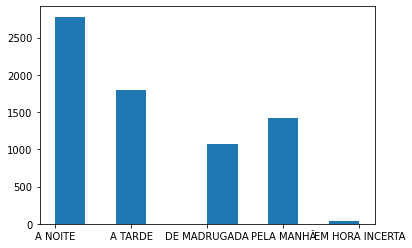

In [16]:
#Plot do período da ocorrência
plt.hist(dados.PERIDOOCORRENCIA);

**Período da noite é onde acontece o maior numeros de ocorrências**

### FLAGRANTE

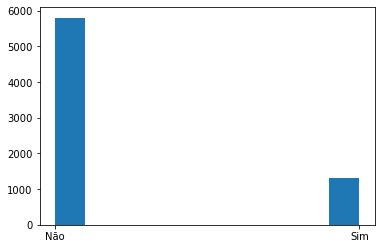

In [17]:
#Plot do período da ocorrência
plt.hist(dados.FLAGRANTE);

In [18]:
#Porcentagem do numero de flagrantes
s = len(dados[dados.FLAGRANTE=='Sim'])
n = len(dados[dados.FLAGRANTE=='Não'])
ps = round(s/(s+n),2)
pn = round(n/(n+s),2)
print(f'Porcentagem de não flagrante: {pn*100}%')
print(f'Porcentagem flagrante: {ps*100}%')

Porcentagem de não flagrante: 82.0%
Porcentagem flagrante: 18.0%


**Percebemos uma discrepância entre o número de flagrantes, 82% das ocorrências não há flagrante**

### CIDADE

In [19]:
#Número de ocorrências por cidade
cid = pd.DataFrame(dados.groupby('CIDADE')['ANO_BO'].count())
cid.sort_values('ANO_BO',ascending=False).head(10)

,ANO_BO
CIDADE,
S.PAULO,2901
CAMPINAS,339
GUARULHOS,334
S.BERNARDO DO CAMPO,327
S.ANDRE,308
DIADEMA,146
OSASCO,131
MAUA,114
ITAQUAQUECETUBA,110


**O número de ocorrência é diretamente proporcional ao tamanho territorial de cada cidade, portanto a cidade de São Paulo por ter o maior território no estado de São Paulo, é maior em número de ocorrências**

In [20]:
from folium.plugins import FastMarkerCluster

#Medias para inicialização no ponto do mapa
media_lat = dados.LATITUDE.mean()
media_long = dados.LONGITUDE.mean()


#Quantidade de roubos no formato granularizado
fmap = folium.Map(location=[media_lat,media_long])
j =FastMarkerCluster(dados[['LATITUDE','LONGITUDE']])
fmap.add_child(j)
fmap

**Mostrando o número de clusters por região, fica mais evidente perceber o número de ocorrência próximo aos grandes centros**

### STATUS

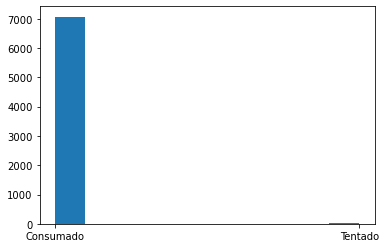

In [21]:
#Plot do ato
plt.hist(dados.STATUS);

**Praticamente todos os B.O foram feitos por atos consumados**

### DESCR_MARCA_VEICULO

In [22]:
marca = pd.DataFrame(dados.groupby('DESCR_MARCA_VEICULO')['ANO_BO'].count())
marca.sort_values('ANO_BO',ascending=False).head(10)

,ANO_BO
DESCR_MARCA_VEICULO,
HONDA/CG 160 FAN,154
HONDA/CG 160 START,99
HONDA/CG 160 TITAN,85
YAMAHA/FZ25 FAZER,72
HONDA/XRE 300,70
HONDA/CB 300R,61
HONDA/XRE 300 ABS,50
YAMAHA/MT03 ABS,43
HONDA/CG150 FAN ESDI,39


**As marcas que ocorrem mais B.O são: HONDA seguida pela YAMAHA**

### ANO_FABRICACAO

In [23]:
#Ano de fabricação do veículo da ocorrência
plt.figure(figsize=(16, 5))
dados['ANO_FABRICACAO'] = dados['ANO_FABRICACAO'].map(str)
fabri = pd.DataFrame(dados.groupby('ANO_FABRICACAO')['ANO_BO'].count())
fabri.sort_values('ANO_BO',ascending=False).head(10)

,ANO_BO
ANO_FABRICACAO,
0.0,1758
2021.0,605
2019.0,542
2020.0,498
2013.0,408
2018.0,376
2011.0,317
2014.0,298
2012.0,277


<Figure size 1152x360 with 0 Axes>

**Excluindo o ano 0 que se dá pela falta de registro, praticamente o ano dos carros que possuem mais B.O são dos mais novos aos mais antigos**

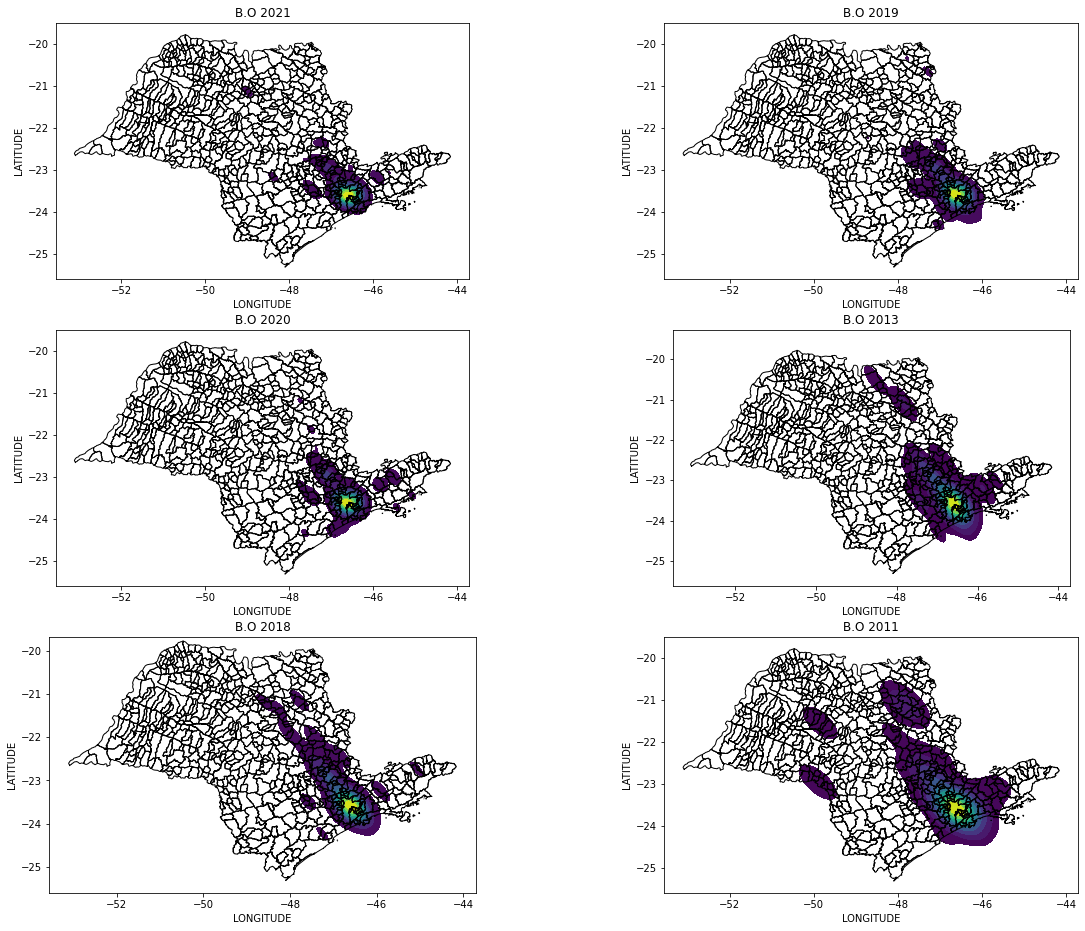

In [24]:
#HeatMap
fig,ax = plt.subplots(3,2,figsize=(20,16))

p21 = dados[dados.ANO_FABRICACAO=='2021.0']
sns.kdeplot(p21.LONGITUDE,p21.LATITUDE, shade=True, cmap='viridis',ax=ax[0,0]).set_title('B.O 2021')
sp.plot(ax=ax[0,0],facecolor='None',edgecolor='black');


p19 = dados[dados.ANO_FABRICACAO=='2019.0']
sns.kdeplot(p19.LONGITUDE,p19.LATITUDE, shade=True, cmap='viridis',ax=ax[0,1]).set_title('B.O 2019')
sp.plot(ax=ax[0,1],facecolor='None',edgecolor='black');

p20 = dados[dados.ANO_FABRICACAO=='2020.0']
sns.kdeplot(p20.LONGITUDE,p20.LATITUDE, shade=True, cmap='viridis',ax=ax[1,0]).set_title('B.O 2020')
sp.plot(ax=ax[1,0],facecolor='None',edgecolor='black');

p13 = dados[dados.ANO_FABRICACAO=='2013.0']
sns.kdeplot(p13.LONGITUDE,p13.LATITUDE, shade=True, cmap='viridis',ax=ax[1,1]).set_title('B.O 2013')
sp.plot(ax=ax[1,1],facecolor='None',edgecolor='black');

p18 = dados[dados.ANO_FABRICACAO=='2018.0']
sns.kdeplot(p18.LONGITUDE,p18.LATITUDE, shade=True, cmap='viridis',ax=ax[2,0]).set_title('B.O 2018')
sp.plot(ax=ax[2,0],facecolor='None',edgecolor='black');

p11 = dados[dados.ANO_FABRICACAO=='2011.0']
sns.kdeplot(p11.LONGITUDE,p11.LATITUDE, shade=True, cmap='viridis',ax=ax[2,1]).set_title('B.O 2011')
sp.plot(ax=ax[2,1],facecolor='None',edgecolor='black');

**A concentração dos carros mais novos se dá na região central de São Paulo, já os carros mais antigos têm concentração em mais áreas**

### DESCR_TIPO_VEICULO

In [25]:
#Descrição do veiculos
veiculos = pd.DataFrame(dados.groupby('DESCR_TIPO_VEICULO')['ANO_BO'].count())
veiculos.sort_values('ANO_BO',ascending=False).head(10)

,ANO_BO
DESCR_TIPO_VEICULO,
AUTOMOVEL,2081
MOTOCICLO,1900
CAMINHONETE,403
SEMI-REBOQUE,219
CAMINHÃO TRATOR,198
CAMINHÃO,180
CAMIONETA,167
UTILITÁRIO,51
MOTONETA,48


**Automóveis e motocicletas são os veículos que mais são feitos B.O**

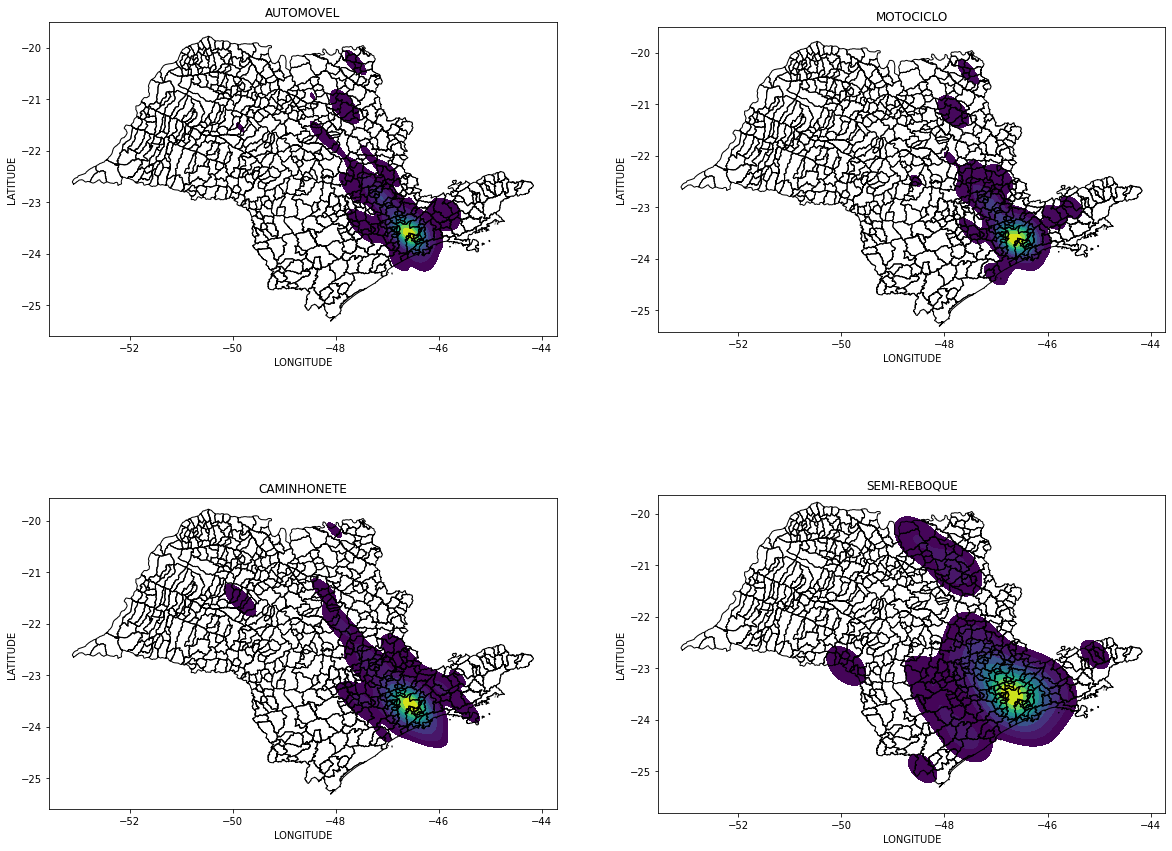

In [26]:
#HeatMap
fig,ax = plt.subplots(2,2,figsize=(20,16))

p21 = dados[dados.DESCR_TIPO_VEICULO=='AUTOMOVEL']
sns.kdeplot(p21.LONGITUDE,p21.LATITUDE, shade=True, cmap='viridis',ax=ax[0,0]).set_title('AUTOMOVEL')
sp.plot(ax=ax[0,0],facecolor='None',edgecolor='black');


p21 = dados[dados.DESCR_TIPO_VEICULO=='MOTOCICLO']
sns.kdeplot(p21.LONGITUDE,p21.LATITUDE, shade=True, cmap='viridis',ax=ax[0,1]).set_title('MOTOCICLO')
sp.plot(ax=ax[0,1],facecolor='None',edgecolor='black');

p21 = dados[dados.DESCR_TIPO_VEICULO=='CAMINHONETE']
sns.kdeplot(p21.LONGITUDE,p21.LATITUDE, shade=True, cmap='viridis',ax=ax[1,0]).set_title('CAMINHONETE')
sp.plot(ax=ax[1,0],facecolor='None',edgecolor='black');

p21 = dados[dados.DESCR_TIPO_VEICULO=='SEMI-REBOQUE']
sns.kdeplot(p21.LONGITUDE,p21.LATITUDE, shade=True, cmap='viridis',ax=ax[1,1]).set_title('SEMI-REBOQUE')
sp.plot(ax=ax[1,1],facecolor='None',edgecolor='black');



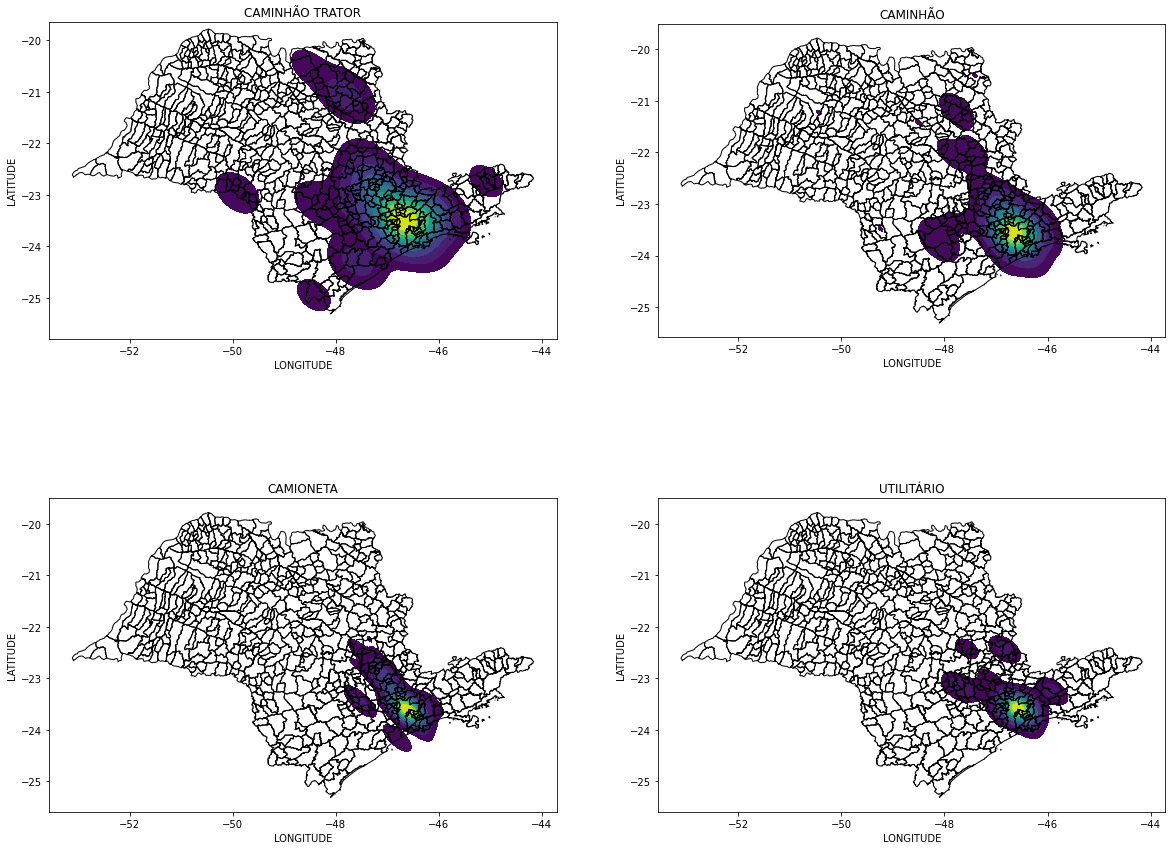

In [27]:
#HeatMap
fig,ax = plt.subplots(2,2,figsize=(20,16))

p21 = dados[dados.DESCR_TIPO_VEICULO=='CAMINHÃO TRATOR']
sns.kdeplot(p21.LONGITUDE,p21.LATITUDE, shade=True, cmap='viridis',ax=ax[0,0]).set_title('CAMINHÃO TRATOR')
sp.plot(ax=ax[0,0],facecolor='None',edgecolor='black');

p21 = dados[dados.DESCR_TIPO_VEICULO=='CAMINHÃO']
sns.kdeplot(p21.LONGITUDE,p21.LATITUDE, shade=True, cmap='viridis',ax=ax[0,1]).set_title('CAMINHÃO')
sp.plot(ax=ax[0,1],facecolor='None',edgecolor='black');


p21 = dados[dados.DESCR_TIPO_VEICULO=='CAMIONETA']
sns.kdeplot(p21.LONGITUDE,p21.LATITUDE, shade=True, cmap='viridis',ax=ax[1,0]).set_title('CAMIONETA')
sp.plot(ax=ax[1,0],facecolor='None',edgecolor='black');

p21 = dados[dados.DESCR_TIPO_VEICULO=='UTILITÁRIO']
sns.kdeplot(p21.LONGITUDE,p21.LATITUDE, shade=True, cmap='viridis',ax=ax[1,1]).set_title('UTILITÁRIO')
sp.plot(ax=ax[1,1],facecolor='None',edgecolor='black');



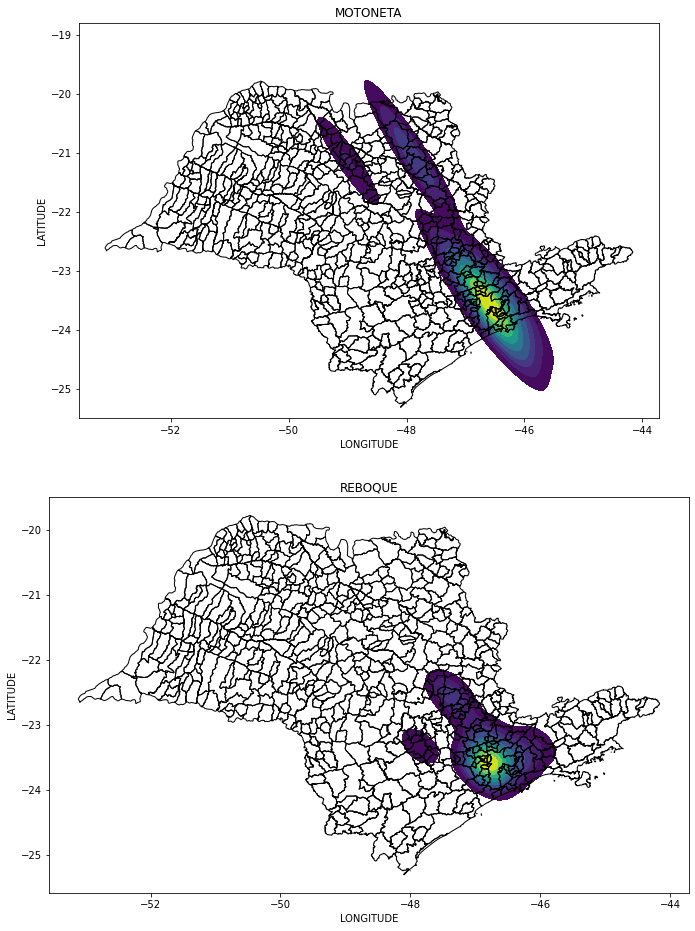

In [28]:
#HeatMap
fig,ax = plt.subplots(2,figsize=(20,16))

p21 = dados[dados.DESCR_TIPO_VEICULO=='MOTONETA']
sns.kdeplot(p21.LONGITUDE,p21.LATITUDE, shade=True, cmap='viridis',ax=ax[0]).set_title('MOTONETA')
sp.plot(ax=ax[0],facecolor='None',edgecolor='black');

p21 = dados[dados.DESCR_TIPO_VEICULO=='REBOQUE']
sns.kdeplot(p21.LONGITUDE,p21.LATITUDE, shade=True, cmap='viridis',ax=ax[1]).set_title('REBOQUE')
sp.plot(ax=ax[1],facecolor='None',edgecolor='black');

**Observamos que os Veículos: Caminhão Trator e Semi-Reboque, são as ocorrências que mais variam no estado de São Paulo, já os veículos: Reboque, Camioneta e Utilitários são as ocorrências que tem mais concentração na região central de São Paulo**

### Dia_da_Semana

In [29]:
# Dia da semana 
semana = pd.DataFrame(dados.groupby('Dia_da_Semana')['ANO_BO'].count())
semana.sort_values('ANO_BO',ascending=False).head(10)

,ANO_BO
Dia_da_Semana,
Tuesday,1418
Friday,1407
Monday,1034
Wednesday,998
Thursday,886
Sunday,835
Saturday,521


**Terça e Sexta-feira são os dias da semana que mais tem frequência de B.O, e os finais de semana são onde há frequência é menor**

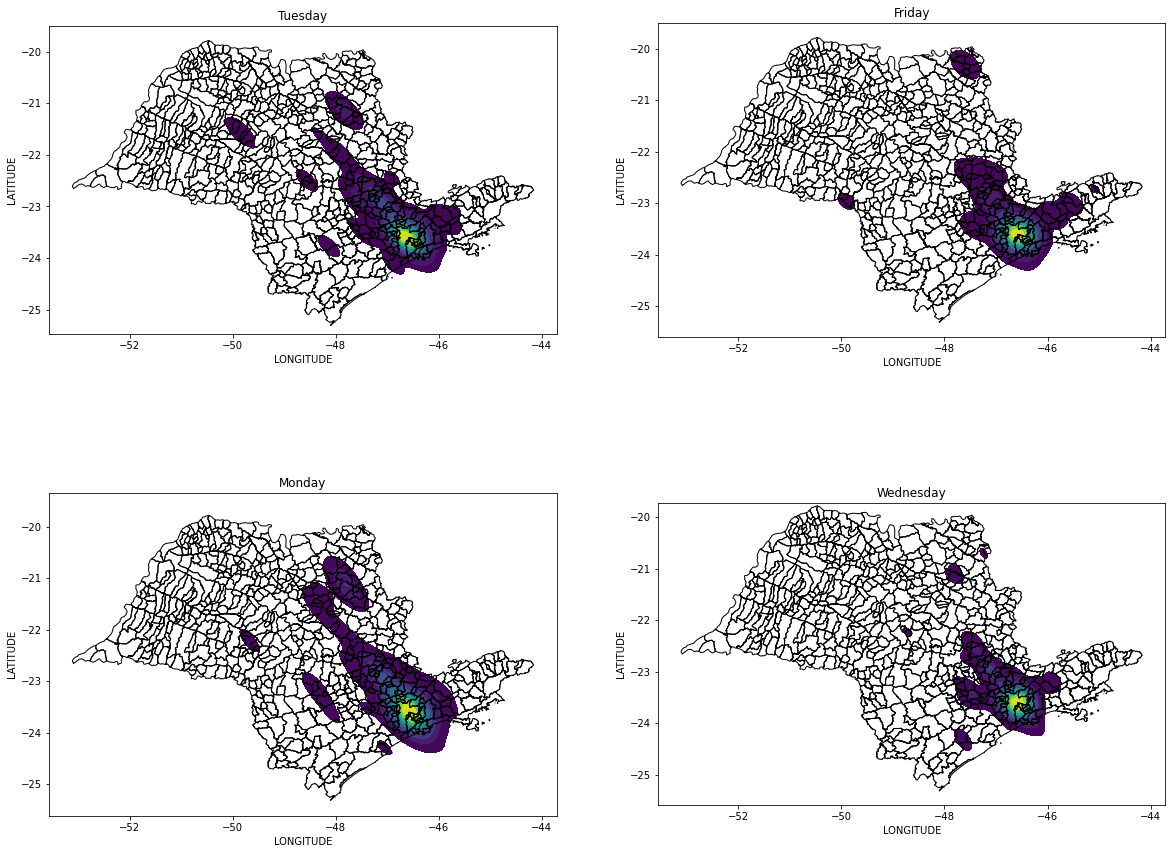

In [30]:
#HeatMap
fig,ax = plt.subplots(2,2,figsize=(20,16))

p21 = dados[dados.Dia_da_Semana=='Tuesday']
sns.kdeplot(p21.LONGITUDE,p21.LATITUDE, shade=True, cmap='viridis',ax=ax[0,0]).set_title('Tuesday')
sp.plot(ax=ax[0,0],facecolor='None',edgecolor='black');

p21 = dados[dados.Dia_da_Semana=='Friday']
sns.kdeplot(p21.LONGITUDE,p21.LATITUDE, shade=True, cmap='viridis',ax=ax[0,1]).set_title('Friday')
sp.plot(ax=ax[0,1],facecolor='None',edgecolor='black');


p21 = dados[dados.Dia_da_Semana=='Monday']
sns.kdeplot(p21.LONGITUDE,p21.LATITUDE, shade=True, cmap='viridis',ax=ax[1,0]).set_title('Monday')
sp.plot(ax=ax[1,0],facecolor='None',edgecolor='black');

p21 = dados[dados.Dia_da_Semana=='Wednesday']
sns.kdeplot(p21.LONGITUDE,p21.LATITUDE, shade=True, cmap='viridis',ax=ax[1,1]).set_title('Wednesday')
sp.plot(ax=ax[1,1],facecolor='None',edgecolor='black');


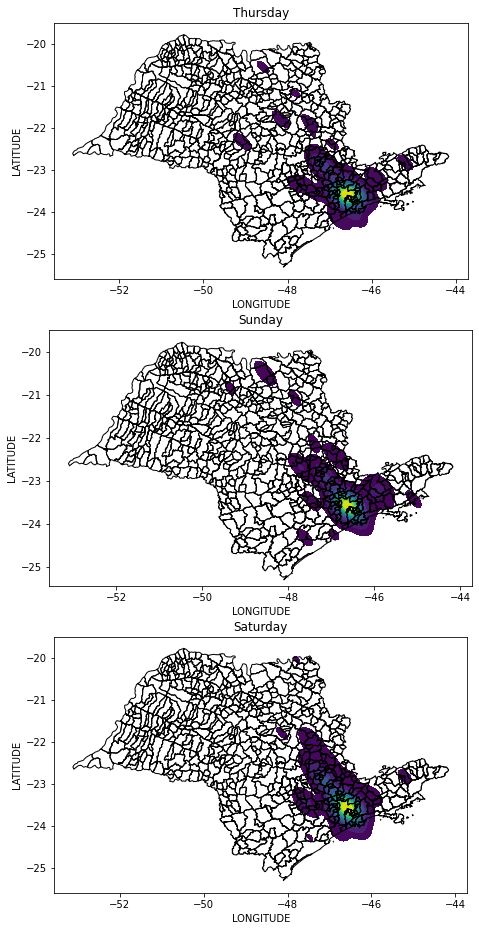

In [31]:
#HeatMap
fig,ax = plt.subplots(3,figsize=(20,16))

p21 = dados[dados.Dia_da_Semana=='Thursday']
sns.kdeplot(p21.LONGITUDE,p21.LATITUDE, shade=True, cmap='viridis',ax=ax[0]).set_title('Thursday')
sp.plot(ax=ax[0],facecolor='None',edgecolor='black');

p21 = dados[dados.Dia_da_Semana=='Sunday']
sns.kdeplot(p21.LONGITUDE,p21.LATITUDE, shade=True, cmap='viridis',ax=ax[1]).set_title('Sunday')
sp.plot(ax=ax[1],facecolor='None',edgecolor='black');


p21 = dados[dados.Dia_da_Semana=='Saturday']
sns.kdeplot(p21.LONGITUDE,p21.LATITUDE, shade=True, cmap='viridis',ax=ax[2]).set_title('Saturday')
sp.plot(ax=ax[2],facecolor='None',edgecolor='black');

**Apesar de alguns dias da semana haver concentração em mais regiões, a região da cidade de São Paulo predomina a ocorrência de B.O em qualquer dia da semana**

# Conclusão:

**Unir os dados junto com os gráficos de analise espacial dá um entendimento maior do que pode estar havendo nas regiões do mundo, neste miniprojeto os dados eram de ocorrências de roubo de veículo na cidade de São Paulo em 2021, tiramos varios insights durante a analise exploratória como visto acima, porém a principal conclusão foi o Efeito Spillover(Transbordamento), pois as regiões com os índices alto de ocorrência de roubo de veículo estão impactando diretamente as regiões mais próximas com o mesmo efeito.**